# Regularization and Model Selection Techniques

## 1. The Problem of Overfitting

### Why Do We Need Regularization?

In linear regression, we try to minimize the Mean Squared Error (MSE):

$J(w) = \frac{1}{m}\sum_{i=1}^m(y_i - w^Tx_i)^2$

However, this can lead to overfitting when:
1. We have many features compared to samples
2. Features are highly correlated
3. Data contains noise


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(15, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 15)

# Create high-degree polynomial features
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# Fit standard linear regression
model = LinearRegression()
model.fit(X_poly, y)

# Generate points for smooth curve
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Training points')
plt.plot(X_test, y_pred, color='red', label='High-degree polynomial fit')
plt.plot(X_test, np.sin(X_test), color='green', label='True function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting Example: High-Degree Polynomial')
plt.legend()
plt.grid(True)
plt.show()

## 2. Regularization Techniques

### 2.1 L1 Regularization (Lasso)

**Why L1?**
- Encourages sparsity (feature selection)
- Sets some coefficients exactly to zero
- Useful when we believe only some features are important

**Mathematical Formulation:**

$J(w)_{L1} = \frac{1}{m}\sum_{i=1}^m(y_i - w^Tx_i)^2 + \lambda\sum_{j=1}^n|w_j|$

In [ ]:
def plot_lasso_effects():
    # Generate data with many features but only few are relevant
    np.random.seed(42)
    n_samples, n_features = 50, 20
    X = np.random.randn(n_samples, n_features)

    # True coefficients: only first 3 features are relevant
    true_w = np.zeros(n_features)
    true_w[:3] = [1.5, -2, 1]

    # Generate target with noise
    y = X.dot(true_w) + np.random.normal(0, 0.1, n_samples)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Try different alpha values
    alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
    plt.figure(figsize=(12, 6))

    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_scaled, y)
        plt.plot(range(n_features), lasso.coef_, 'o-', label=f'α={alpha}')

    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title('Lasso: Effect of Regularization Strength')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lasso_effects()

### 2.2 L2 Regularization (Ridge)

**Why L2?**
- Handles correlated features well
- Shrinks all coefficients proportionally
- Stabilizes the solution

**Mathematical Formulation:**

$J(w)_{L2} = \frac{1}{m}\sum_{i=1}^m(y_i - w^Tx_i)^2 + \lambda\sum_{j=1}^n w_j^2$

In [ ]:
def plot_ridge_effects():
    # Generate correlated features
    np.random.seed(42)
    n_samples = 50

    # Create two correlated features
    X1 = np.random.normal(0, 1, n_samples)
    X2 = X1 + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
    X = np.column_stack([X1, X2])

    # Generate target
    y = X1 * 1.5 + X2 * (-0.5) + np.random.normal(0, 0.1, n_samples)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Try different alpha values
    alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
    coefficients = []

    plt.figure(figsize=(12, 6))
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_scaled, y)
        coefficients.append(ridge.coef_)

    coefficients = np.array(coefficients)
    plt.plot(alphas, coefficients[:, 0], 'o-', label='Feature 1')
    plt.plot(alphas, coefficients[:, 1], 'o-', label='Feature 2')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Coefficient Value')
    plt.title('Ridge: Effect of Regularization on Correlated Features')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_ridge_effects()

### 2.3 Elastic Net

**Why Elastic Net?**
- Combines benefits of L1 and L2
- Better handles groups of correlated features
- Particularly useful when n_features > n_samples

**Mathematical Formulation:**

$J(w)_{EN} = \frac{1}{m}\sum_{i=1}^m(y_i - w^Tx_i)^2 + \lambda_1\sum_{j=1}^n|w_j| + \lambda_2\sum_{j=1}^n w_j^2$


## 3. Cross-Validation

**Why Cross-Validation?**
- More reliable estimation of model performance
- Helps prevent overfitting
- Better use of limited data

**Mathematical Formulation:**
For k-fold CV, the error is:

$CV_{(k)} = \frac{1}{k}\sum_{i=1}^k \text{MSE}_i$

where $\text{MSE}_i$ is the mean squared error on fold i.


Linear Regression Best Case:
Few Uncorrelated Features
Mean Absolute Difference from True Coefficients:
Linear    : 0.0403
Ridge     : 0.0439
Lasso     : 0.1309
ElasticNet: 0.1283


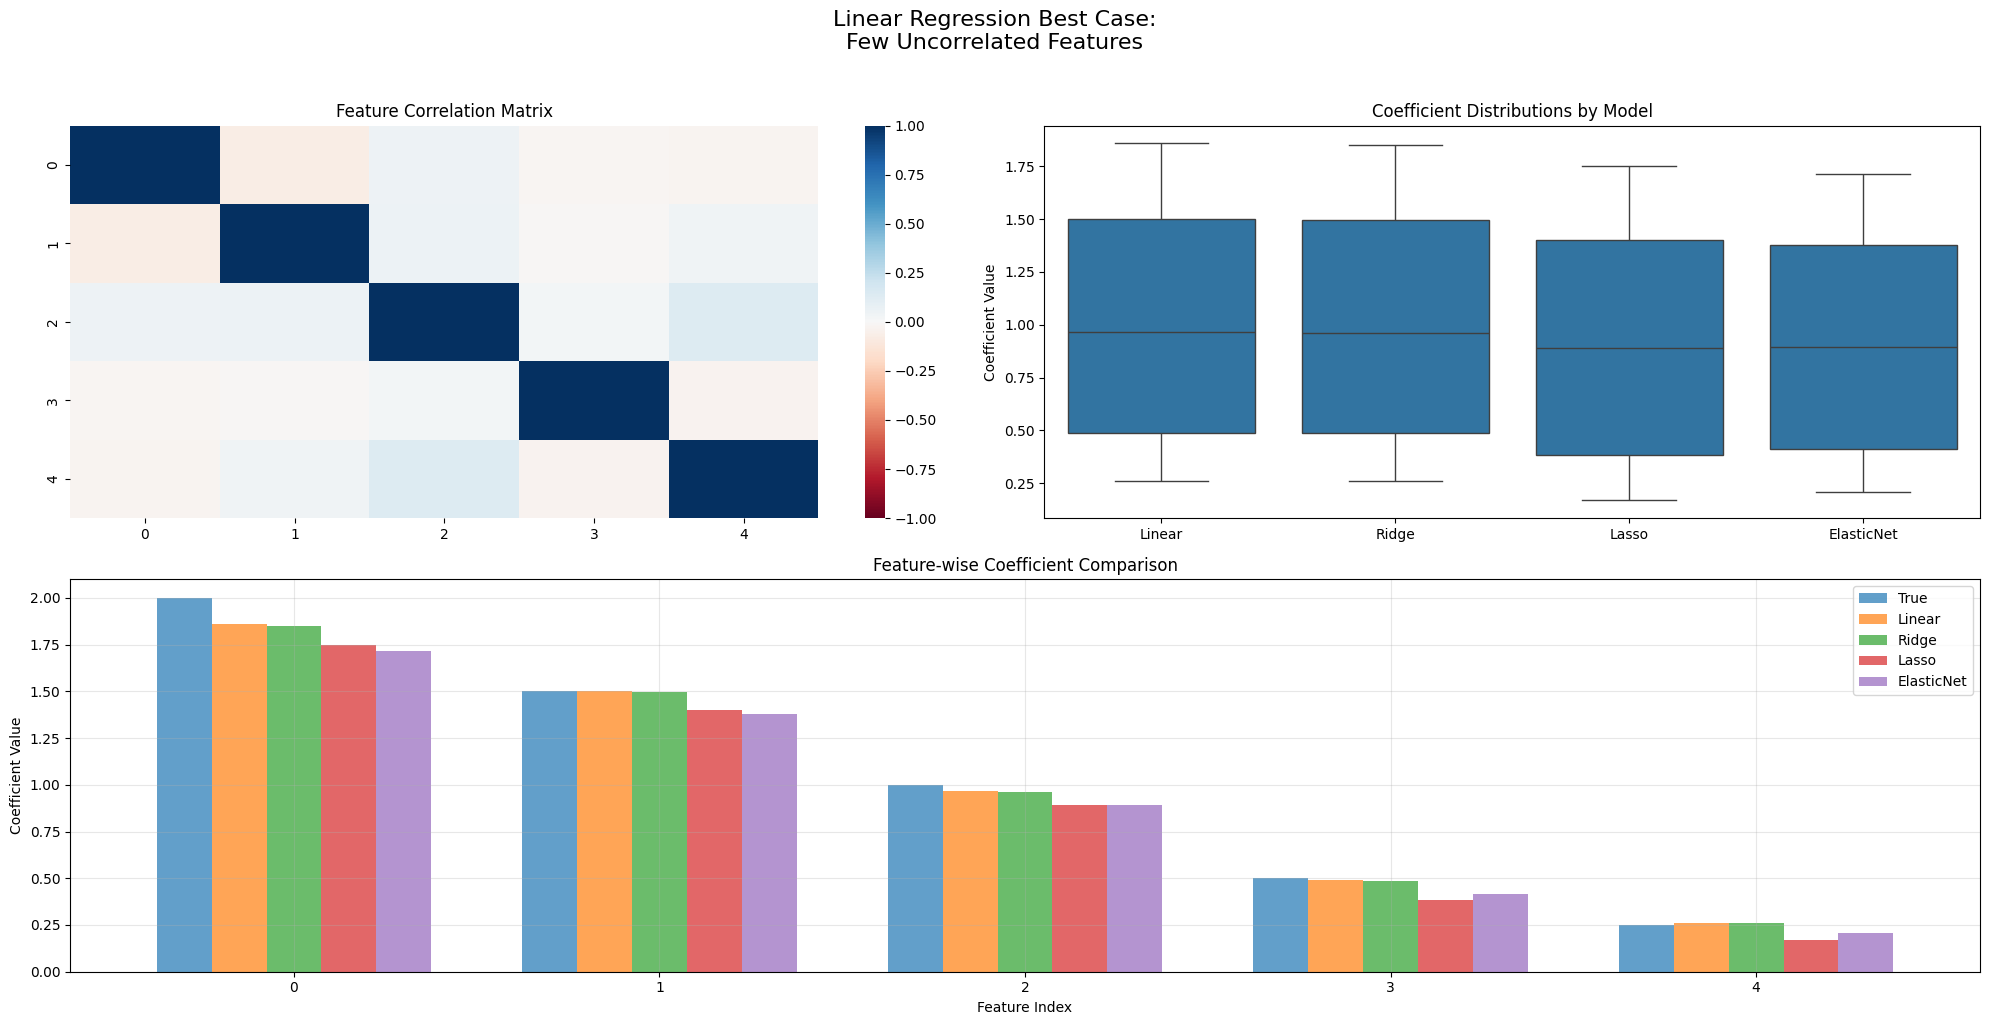


Ridge Regression Best Case:
Many Correlated Features
Mean Absolute Difference from True Coefficients:
Linear    : 0.0337
Ridge     : 0.0253
Lasso     : 0.0641
ElasticNet: 0.0320


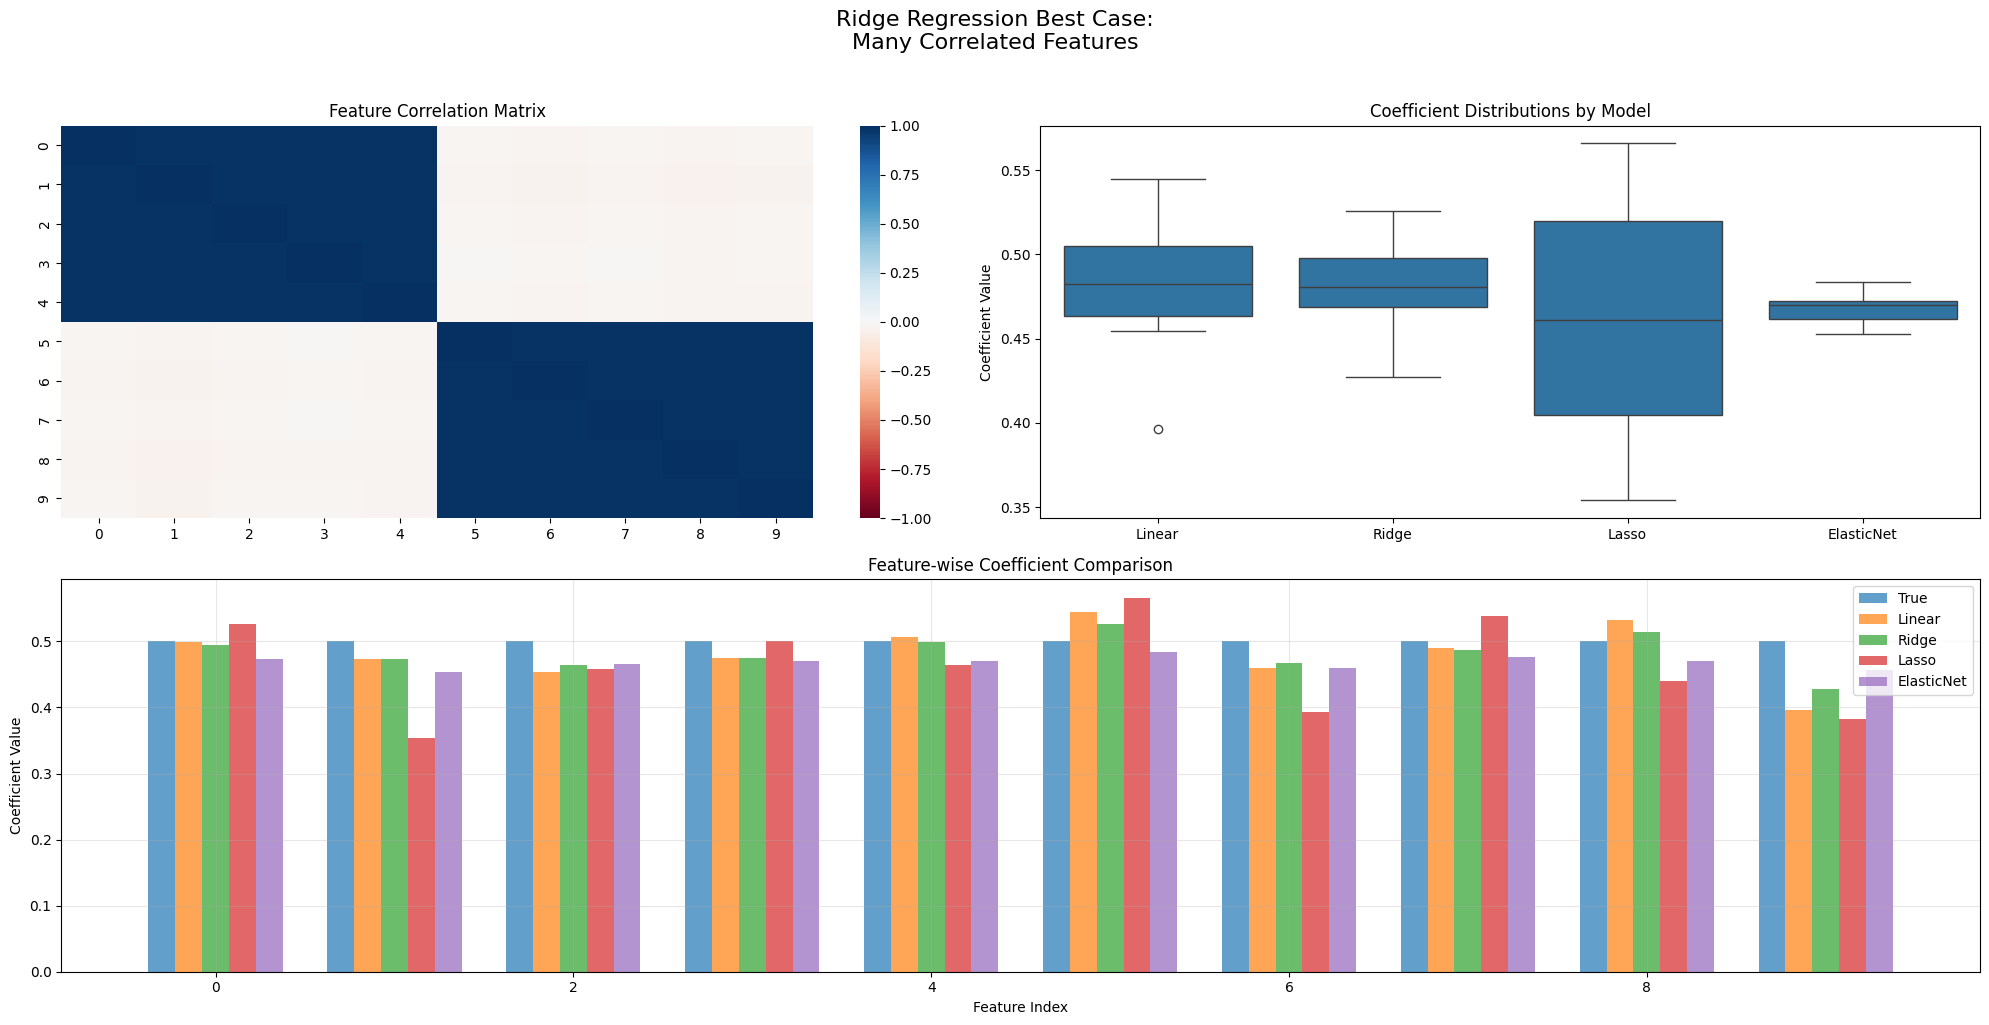


Lasso Regression Best Case:
Sparse Feature Importance
Mean Absolute Difference from True Coefficients:
Linear    : 0.0138
Ridge     : 0.0144
Lasso     : 0.0240
ElasticNet: 0.0265


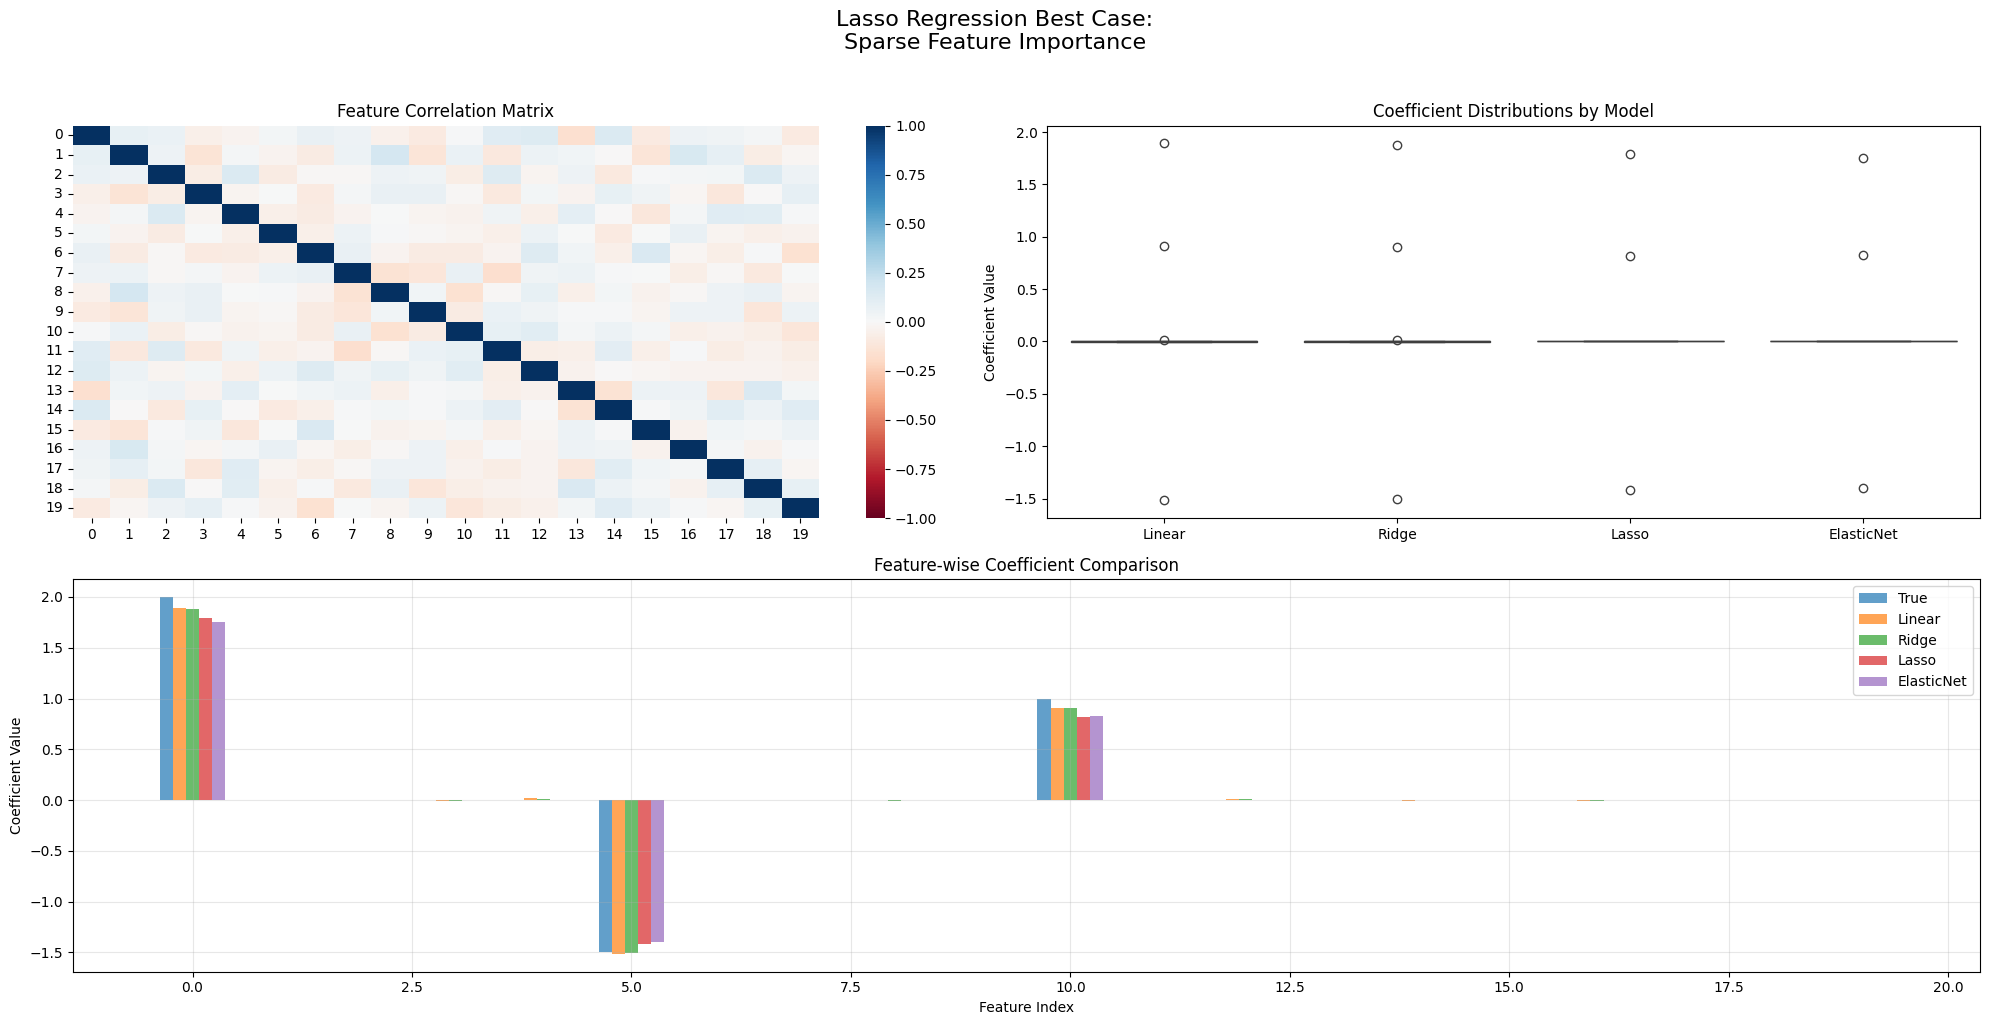


ElasticNet Best Case:
Mixed Structure
Mean Absolute Difference from True Coefficients:
Linear    : 0.0390
Ridge     : 0.0401
Lasso     : 0.0674
ElasticNet: 0.0555


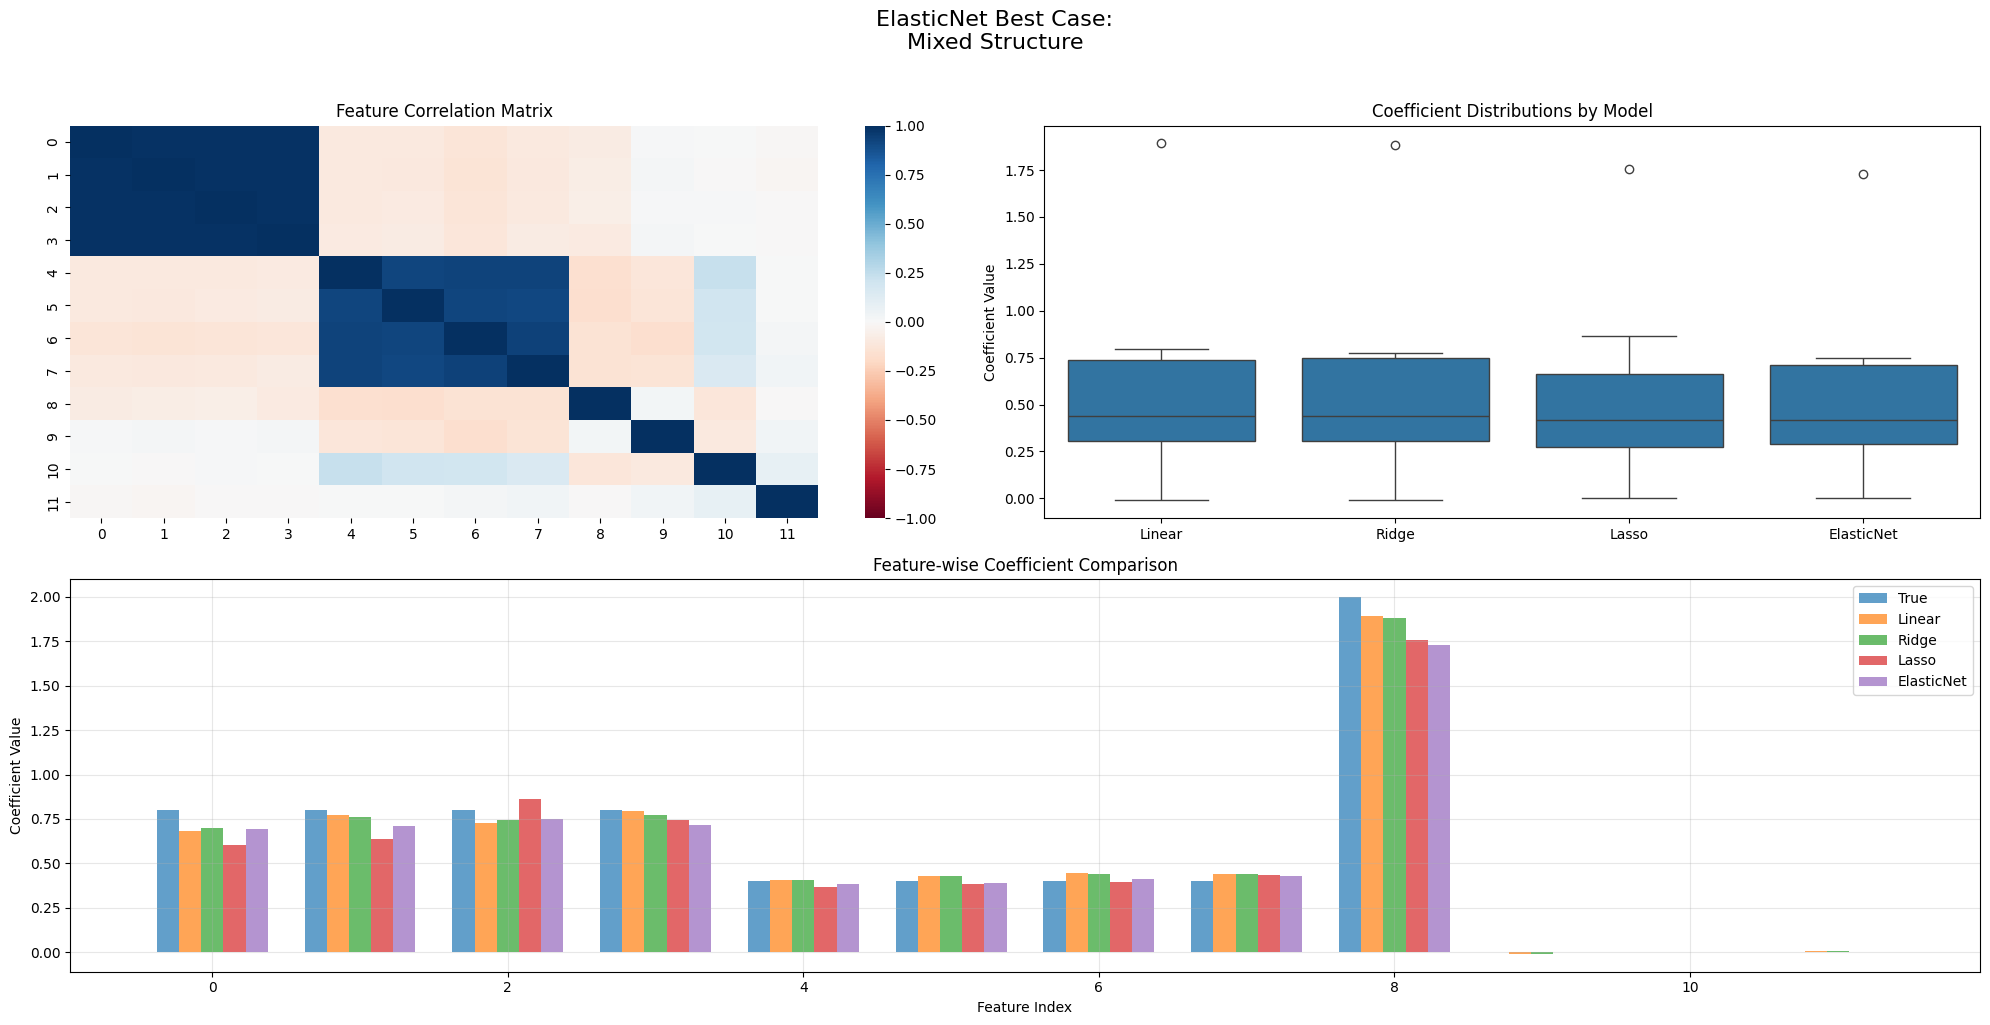

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

def generate_linear_best_data(n_samples=200, random_state=42):
    """Perfect scenario for Linear Regression:
    Few uncorrelated features with clear linear relationships"""
    np.random.seed(random_state)

    # Generate independent features
    X = np.random.normal(0, 1, (n_samples, 5))

    # Clear linear relationships with no noise
    true_coefs = np.array([2.0, 1.5, 1.0, 0.5, 0.25])
    y = X @ true_coefs + np.random.normal(0, 0.1, n_samples)

    return X, y, true_coefs, "Linear Regression Best Case:\nFew Uncorrelated Features"

def generate_ridge_best_data(n_samples=200, random_state=42):
    """Perfect scenario for Ridge:
    Many highly correlated features with similar importance"""
    np.random.seed(random_state)

    # Create base signals
    X_base = np.random.normal(0, 1, (n_samples, 2))

    # Create correlated features
    X = []
    for base in X_base.T:
        X.extend([base + np.random.normal(0, 0.1, n_samples) for _ in range(5)])
    X = np.column_stack(X)

    # All features contribute somewhat equally
    true_coefs = np.ones(X.shape[1]) * 0.5
    y = X @ true_coefs + np.random.normal(0, 0.1, n_samples)

    return X, y, true_coefs, "Ridge Regression Best Case:\nMany Correlated Features"

def generate_lasso_best_data(n_samples=200, random_state=42):
    """Perfect scenario for Lasso:
    Many features but only few are relevant"""
    np.random.seed(random_state)

    # Many independent features
    X = np.random.normal(0, 1, (n_samples, 20))

    # Only few features matter
    true_coefs = np.zeros(20)
    true_coefs[0] = 2.0
    true_coefs[5] = -1.5
    true_coefs[10] = 1.0

    y = X @ true_coefs + np.random.normal(0, 0.1, n_samples)

    return X, y, true_coefs, "Lasso Regression Best Case:\nSparse Feature Importance"

def generate_elasticnet_best_data(n_samples=200, random_state=42):
    """Perfect scenario for ElasticNet:
    Mix of correlated groups and sparse features"""
    np.random.seed(random_state)

    # Group 1: Highly correlated
    X1_base = np.random.normal(0, 1, n_samples)
    X1 = np.column_stack([X1_base + np.random.normal(0, 0.1, n_samples) for _ in range(4)])

    # Group 2: Moderately correlated
    X2_base = np.random.normal(0, 1, n_samples)
    X2 = np.column_stack([X2_base + np.random.normal(0, 0.3, n_samples) for _ in range(4)])

    # Independent features
    X3 = np.random.normal(0, 1, (n_samples, 4))

    X = np.hstack([X1, X2, X3])

    # Mixed coefficient structure
    true_coefs = np.zeros(12)
    true_coefs[:4] = 0.8  # First group effect
    true_coefs[4:8] = 0.4  # Second group effect
    true_coefs[8] = 2.0  # One strong independent feature

    y = X @ true_coefs + np.random.normal(0, 0.1, n_samples)

    return X, y, true_coefs, "ElasticNet Best Case:\nMixed Structure"

def plot_regression_comparison(X, y, true_coefs, title):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit models
    models = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1, max_iter=10000, tol=1e-4),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4)
    }

    coef_dict = {}
    for name, model in models.items():
        model.fit(X_scaled, y)
        coef_dict[name] = model.coef_

    # Create figure
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 2)

    # 1. Correlation matrix
    ax1 = fig.add_subplot(gs[0, 0])
    sns.heatmap(np.corrcoef(X.T), cmap='RdBu', center=0, vmin=-1, vmax=1, ax=ax1)
    ax1.set_title('Feature Correlation Matrix')

    # 2. Coefficient distributions
    ax2 = fig.add_subplot(gs[0, 1])
    coef_data = []
    labels = []
    for name, coefs in coef_dict.items():
        coef_data.extend(coefs)
        labels.extend([name] * len(coefs))

    sns.boxplot(x=labels, y=coef_data, ax=ax2)
    ax2.set_title('Coefficient Distributions by Model')
    ax2.set_ylabel('Coefficient Value')

    # 3. Feature importance comparison
    ax3 = fig.add_subplot(gs[1, :])
    width = 0.15
    x = np.arange(len(true_coefs))

    ax3.bar(x - 2*width, true_coefs, width, label='True', alpha=0.7)
    for i, (name, coefs) in enumerate(coef_dict.items()):
        ax3.bar(x + (i-1)*width, coefs, width, label=name, alpha=0.7)

    ax3.set_title('Feature-wise Coefficient Comparison')
    ax3.set_xlabel('Feature Index')
    ax3.set_ylabel('Coefficient Value')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.suptitle(title, y=1.02, fontsize=16)
    plt.tight_layout()

    # Print model performance
    print(f"\n{title}")
    print("Mean Absolute Difference from True Coefficients:")
    for name, coefs in coef_dict.items():
        mad = np.mean(np.abs(coefs - true_coefs))
        print(f"{name:10s}: {mad:.4f}")

# Generate and plot for each scenario
scenarios = [
    generate_linear_best_data,
    generate_ridge_best_data,
    generate_lasso_best_data,
    generate_elasticnet_best_data
]

for generate_data in scenarios:
    X, y, true_coefs, title = generate_data()
    plot_regression_comparison(X, y, true_coefs, title)
    plt.show()

## 4. Grid Search

**Why Grid Search?**
- Systematic way to find optimal hyperparameters
- Prevents manual trial and error
- More reliable than intuition-based parameter selection


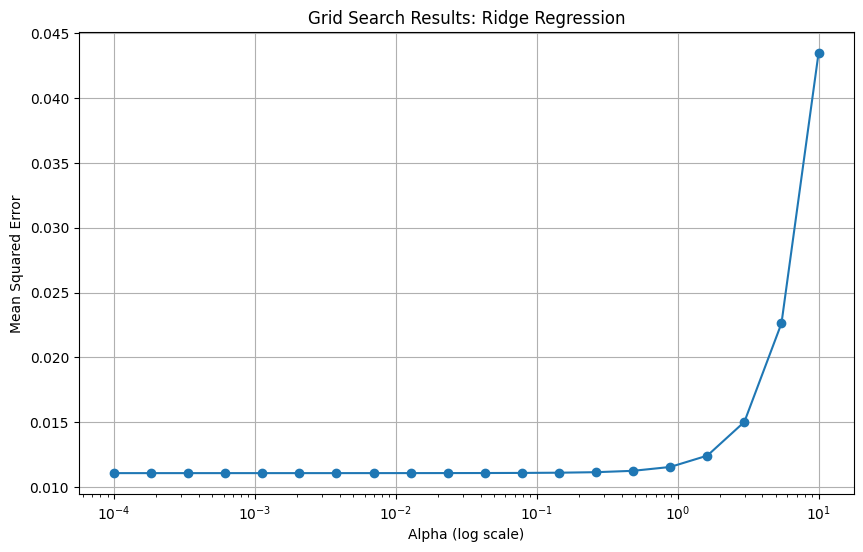

Best alpha: 0.0001
Best score (MSE): 0.0111


In [31]:
def plot_grid_search_results():
    # Generate data
    np.random.seed(42)
    X = np.random.randn(100, 10)
    true_w = np.zeros(10)
    true_w[:3] = [1, 0.5, -0.8]
    y = X.dot(true_w) + np.random.normal(0, 0.1, 100)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define parameter grid
    param_grid = {
        'alpha': np.logspace(-4, 1, 20)
    }

    # Perform grid search
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_scaled, y)

    # Plot results
    plt.figure(figsize=(10, 6))
    scores = -grid_search.cv_results_['mean_test_score']  # Convert to positive MSE
    plt.plot(param_grid['alpha'], scores, 'o-')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Mean Squared Error')
    plt.title('Grid Search Results: Ridge Regression')
    plt.grid(True)
    plt.show()

    print(f"Best alpha: {grid_search.best_params_['alpha']:.4f}")
    print(f"Best score (MSE): {-grid_search.best_score_:.4f}")

plot_grid_search_results()